In [ ]:
# Author : Raude Killian
# Last modified 17.07.205

In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
from scipy.stats import ttest_rel
%matplotlib inline


PARTICIPANTS_FILE = r"L:\Common\Users\Qiaoyue\MEG_project\Data\participants.csv"

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

participants = pd.read_csv(PARTICIPANTS_FILE)  
participants = participants['subID'].astype(str).tolist()
sessions = ["recall"]

print(f"✅ Participant list : {participants}")

✅ Participant list : ['F103', 'F104', 'F105', 'F106', 'F107', 'F108', 'F109', 'F111', 'F112', 'F113', 'F114', 'F115', 'F116', 'F117', 'F118', 'F119', 'F120']


In [2]:
# For tests purposes
#participants = ["F103","F104","F107","F108","F111","F112","F113","F114"]
#participants = ["F103"]

In [3]:
evoked_all_cong = []
evoked_all_incong = []
evoked_all_new = []
evoked_all_old = []

for subID in participants:

    plots_folder = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\plots\{subID}"
    os.makedirs(plots_folder, exist_ok=True)
    intermediates_folder = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\finals\{subID}"
    #intermediates_folder = rf"C:\Users\killg\Desktop\finals\{subID}"
    os.makedirs(intermediates_folder, exist_ok=True)

    # Declare filenames 
    evoked_filename = rf"{intermediates_folder}/{subID}_cong_evoked.fif"
    evoked = mne.read_evokeds(evoked_filename, verbose=False)[0]
    evoked_all_cong.append(evoked)

    evoked_filename = rf"{intermediates_folder}/{subID}_incong_evoked.fif"
    evoked = mne.read_evokeds(evoked_filename, verbose=False)[0]
    evoked_all_incong.append(evoked)

    evoked_filename = rf"{intermediates_folder}/{subID}_new_evoked.fif"
    evoked = mne.read_evokeds(evoked_filename, verbose=False)[0]
    evoked_all_new.append(evoked)

    evoked_filename = rf"{intermediates_folder}/{subID}_old_evoked.fif"
    evoked = mne.read_evokeds(evoked_filename, verbose=False)[0]
    evoked_all_old.append(evoked)

    print(f"Extracting evoked: {subID}... ")
print(f"✅ Done")

Extracting evoked: F103... 
Extracting evoked: F104... 
Extracting evoked: F105... 
Extracting evoked: F106... 
Extracting evoked: F107... 
Extracting evoked: F108... 
Extracting evoked: F109... 
Extracting evoked: F111... 
Extracting evoked: F112... 
Extracting evoked: F113... 
Extracting evoked: F114... 
Extracting evoked: F115... 
Extracting evoked: F116... 
Extracting evoked: F117... 
Extracting evoked: F118... 
Extracting evoked: F119... 
Extracting evoked: F120... 
✅ Done


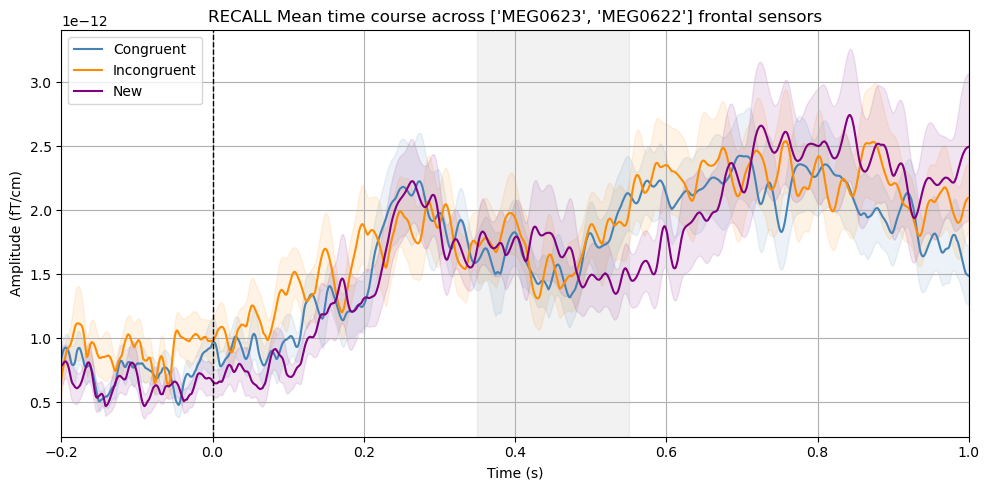

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


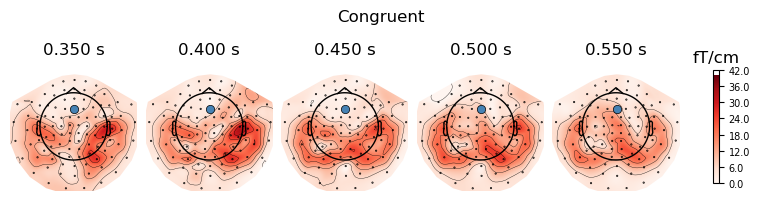

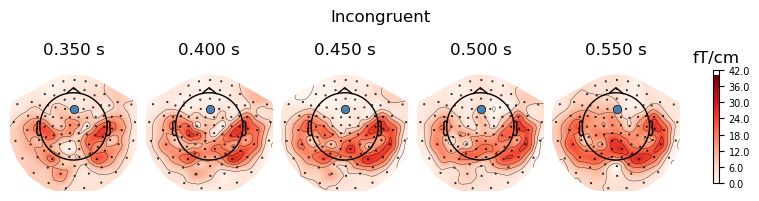

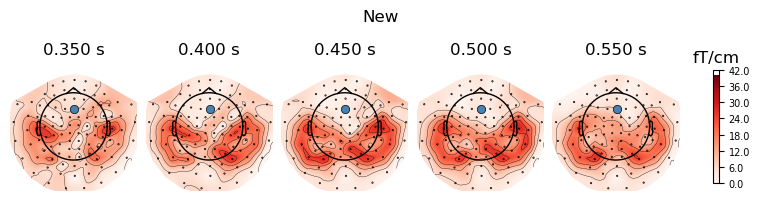

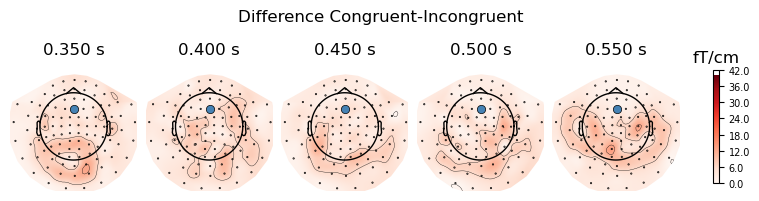

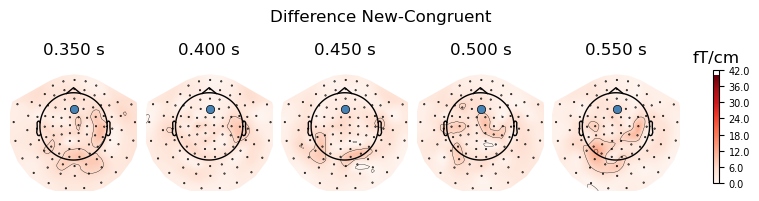

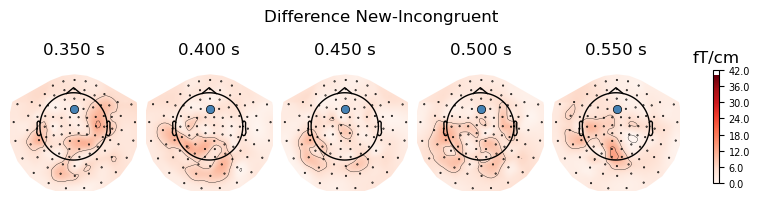

In [29]:
channels = ["MEG0623","MEG0622"] #frontal
topomap_channel = channels[0]       

cong_data = []
incong_data = []
new_data = []

for evoked in evoked_all_cong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    cong_data.append(data)

for evoked in evoked_all_incong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    incong_data.append(data)

for evoked in evoked_all_new:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    new_data.append(data)

time = np.linspace(-0.2, 1.0, len(cong_data[0]))  


# Compute mean and std across sensors
cong_mean_signal = np.mean(cong_data, axis=0)
cong_se_signal = np.std(cong_data, axis=0) / np.sqrt(len(cong_data))
incong_mean_signal = np.mean(incong_data, axis=0)
incong_se_signal = np.std(incong_data, axis=0) / np.sqrt(len(cong_data))
new_mean_signal = np.mean(new_data, axis=0)
new_se_signal = np.std(new_data, axis=0) / np.sqrt(len(cong_data))

cong_data = np.array(cong_data)
incong_data = np.array(incong_data)
new_data = np.array(new_data)

lower_t = 0.35
upper_t = 0.55
time_window = (time >= lower_t) & (time <= upper_t)

cong_amplitudes = np.mean(cong_data[:, time_window], axis=1)
incong_amplitudes = np.mean(incong_data[:, time_window], axis=1)
new_amplitudes = np.mean(new_data[:, time_window], axis=1)


plt.figure(figsize=(10, 5))
plt.plot(time, cong_mean_signal, label='Congruent', color='steelblue')
plt.fill_between(time, cong_mean_signal - cong_se_signal, cong_mean_signal + cong_se_signal,
                 color='steelblue', alpha=0.1)

plt.plot(time, incong_mean_signal, label='Incongruent', color='darkorange')
plt.fill_between(time, incong_mean_signal - incong_se_signal, incong_mean_signal + incong_se_signal,
                 color='darkorange', alpha=0.1)

plt.plot(time, new_mean_signal, label='New', color='purple')
plt.fill_between(time, new_mean_signal - new_se_signal, new_mean_signal + new_se_signal,
                 color='purple', alpha=0.1)


plt.xlabel('Time (s)')
plt.ylabel('Amplitude (fT/cm)')
plt.title(f'RECALL Mean time course across {channels} frontal sensors')
plt.legend(loc="upper left")
plt.xlim(-0.2,1)
plt.axvline(x=0, linestyle='--', linewidth=1, color='black')
plt.axvspan(lower_t, upper_t, color='grey', alpha=0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Topomap (only one gradiometer)
times = np.arange(lower_t, upper_t + 0.02, 0.05)
vmin, vmax = 0, 40

avg_cong = mne.grand_average(evoked_all_cong, interpolate_bads=False)
avg_incong = mne.grand_average(evoked_all_incong, interpolate_bads=False)
avg_new = mne.grand_average(evoked_all_new, interpolate_bads=False)
diff_cong_incong_evoked = mne.combine_evoked([avg_cong, avg_incong], weights=[1, -1])
diff_new_incong_evoked = mne.combine_evoked([avg_new, avg_incong], weights=[1, -1])
diff_new_cong_evoked = mne.combine_evoked([avg_new, avg_cong], weights=[1, -1])

# --- Create mask for only MEG0742
n_channels = len(avg_cong.ch_names)
n_times = len(avg_cong.times)
mask = np.zeros((n_channels, n_times), dtype=bool)

chan_idx = avg_cong.ch_names.index(topomap_channel)
time_idxs = [np.argmin(np.abs(avg_cong.times - t)) for t in times]
for t in time_idxs:
    mask[chan_idx, t] = True

mask_params = dict(markersize=12, markerfacecolor="steelblue")

# --- Plot topomaps
fig = avg_cong.plot_topomap(times, ch_type="grad", show=False,
                            vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Congruent")
plt.show()

fig = avg_incong.plot_topomap(times, ch_type="grad", show=False,
                              vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Incongruent")
plt.show()

fig = avg_new.plot_topomap(times, ch_type="grad", show=False,
                              vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"New")
plt.show()


fig = diff_cong_incong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Difference Congruent-Incongruent")
plt.show()

fig = diff_new_cong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Difference New-Congruent")
plt.show()

fig = diff_new_incong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Difference New-Incongruent")
plt.show()

t = 0.647, p = 0.527
t = -0.652, p = 0.524
t = 0.189, p = 0.852


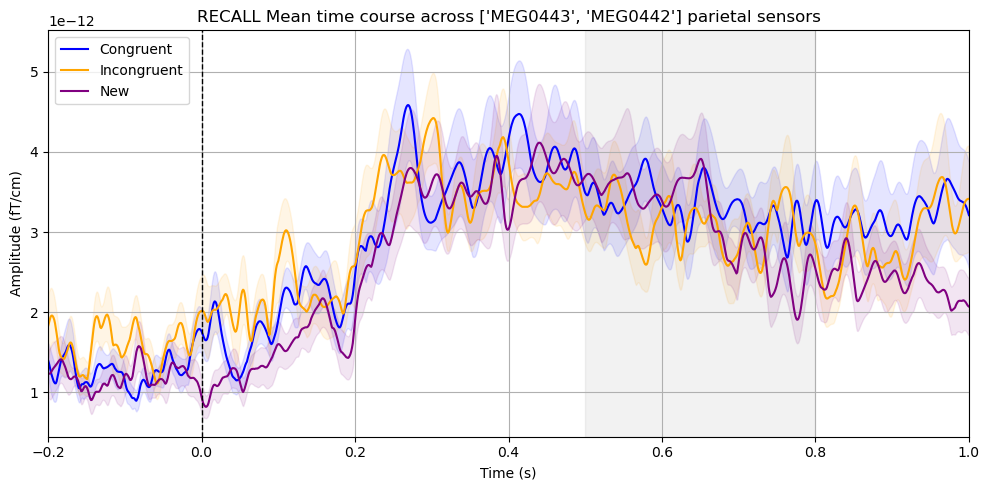

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


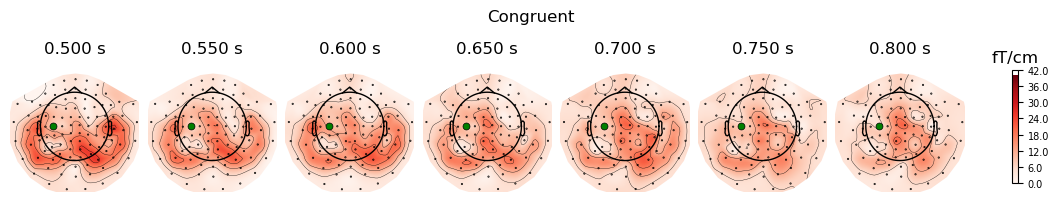

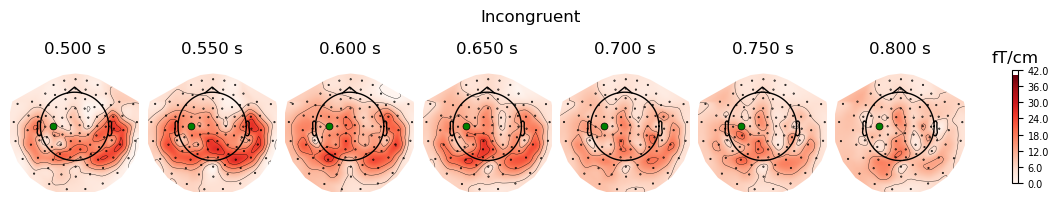

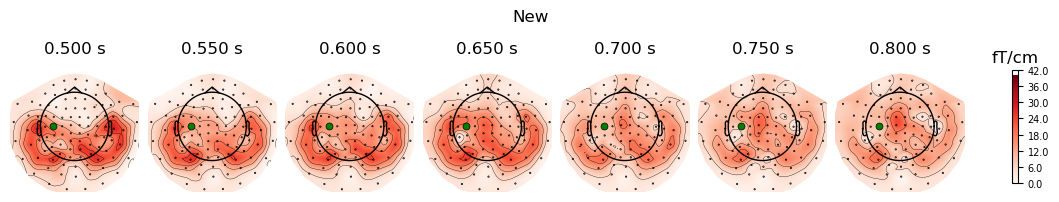

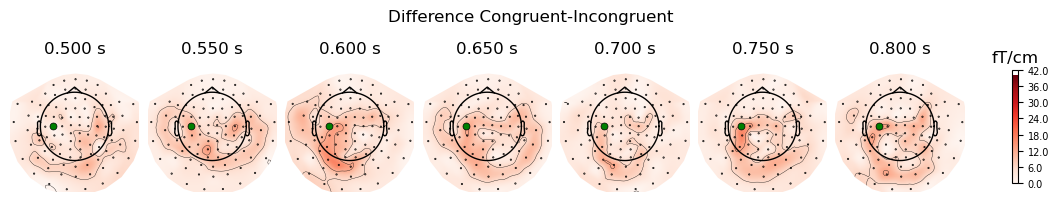

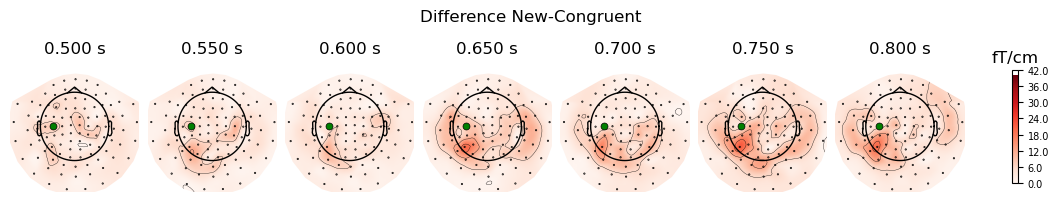

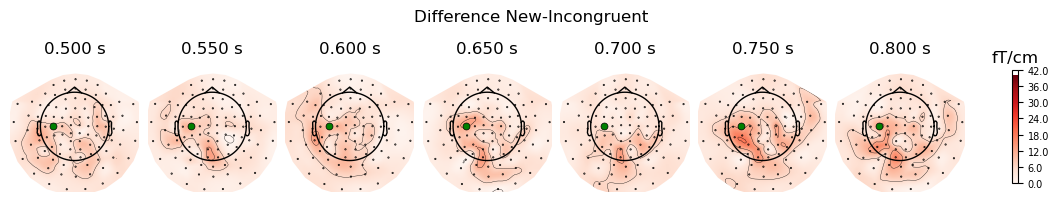

In [ ]:
channels = ["MEG0443","MEG0442"] #parietal
topomap_channel = channels[0]       

cong_data = []
incong_data = []
new_data = []

for evoked in evoked_all_cong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    cong_data.append(data)

for evoked in evoked_all_incong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    incong_data.append(data)

for evoked in evoked_all_new:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    new_data.append(data)

time = np.linspace(-0.2, 1.0, len(cong_data[0]))  


# Compute mean and std across sensors
cong_mean_signal = np.mean(cong_data, axis=0)
cong_se_signal = np.std(cong_data, axis=0) / np.sqrt(len(cong_data))
incong_mean_signal = np.mean(incong_data, axis=0)
incong_se_signal = np.std(incong_data, axis=0) / np.sqrt(len(cong_data))
new_mean_signal = np.mean(new_data, axis=0)
new_se_signal = np.std(new_data, axis=0) / np.sqrt(len(cong_data))

cong_data = np.array(cong_data)
incong_data = np.array(incong_data)
new_data = np.array(new_data)

lower_t = 0.5
upper_t = 0.8
time_window = (time >= lower_t) & (time <= upper_t)

cong_amplitudes = np.mean(cong_data[:, time_window], axis=1)
incong_amplitudes = np.mean(incong_data[:, time_window], axis=1)
new_amplitudes = np.mean(new_data[:, time_window], axis=1)

t_stat, p_value = ttest_rel(cong_amplitudes, incong_amplitudes)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

t_stat, p_value = ttest_rel(new_amplitudes, cong_amplitudes)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

t_stat, p_value = ttest_rel(new_amplitudes, incong_amplitudes)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")


plt.figure(figsize=(10, 5))
plt.plot(time, cong_mean_signal, label='Congruent', color='steelblue')
plt.fill_between(time, cong_mean_signal - cong_se_signal, cong_mean_signal + cong_se_signal,
                 color='steelblue', alpha=0.1)

plt.plot(time, incong_mean_signal, label='Incongruent', color='darkorange')
plt.fill_between(time, incong_mean_signal - incong_se_signal, incong_mean_signal + incong_se_signal,
                 color='darkorange', alpha=0.1)

plt.plot(time, new_mean_signal, label='New', color='purple')
plt.fill_between(time, new_mean_signal - new_se_signal, new_mean_signal + new_se_signal,
                 color='purple', alpha=0.1)


plt.xlabel('Time (s)')
plt.ylabel('Amplitude (fT/cm)')
plt.title(f'RECALL Mean time course across {channels} parietal sensors')
plt.legend(loc="upper left")
plt.xlim(-0.2,1)
plt.axvline(x=0, linestyle='--', linewidth=1, color='black')
plt.axvspan(lower_t, upper_t, color='grey', alpha=0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Topomap (only one gradiometer)
times = np.arange(lower_t, upper_t + 0.02, 0.05)
vmin, vmax = 0, 40

avg_cong = mne.grand_average(evoked_all_cong, interpolate_bads=False)
avg_incong = mne.grand_average(evoked_all_incong, interpolate_bads=False)
avg_new = mne.grand_average(evoked_all_new, interpolate_bads=False)
diff_cong_incong_evoked = mne.combine_evoked([avg_cong, avg_incong], weights=[1, -1])
diff_new_incong_evoked = mne.combine_evoked([avg_new, avg_incong], weights=[1, -1])
diff_new_cong_evoked = mne.combine_evoked([avg_new, avg_cong], weights=[1, -1])

# --- Create mask for only MEG0742
n_channels = len(avg_cong.ch_names)
n_times = len(avg_cong.times)
mask = np.zeros((n_channels, n_times), dtype=bool)

chan_idx = avg_cong.ch_names.index(topomap_channel)
time_idxs = [np.argmin(np.abs(avg_cong.times - t)) for t in times]
for t in time_idxs:
    mask[chan_idx, t] = True

mask_params = dict(markersize=12, markerfacecolor="steelblue")

# --- Plot topomaps
fig = avg_cong.plot_topomap(times, ch_type="grad", show=False,
                            vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Congruent")
plt.show()

fig = avg_incong.plot_topomap(times, ch_type="grad", show=False,
                              vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Incongruent")
plt.show()

fig = avg_new.plot_topomap(times, ch_type="grad", show=False,
                              vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"New")
plt.show()

fig = diff_cong_incong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Difference Congruent-Incongruent")
plt.show()

fig = diff_new_cong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Difference New-Congruent")
plt.show()

fig = diff_new_incong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Difference New-Incongruent")
plt.show()


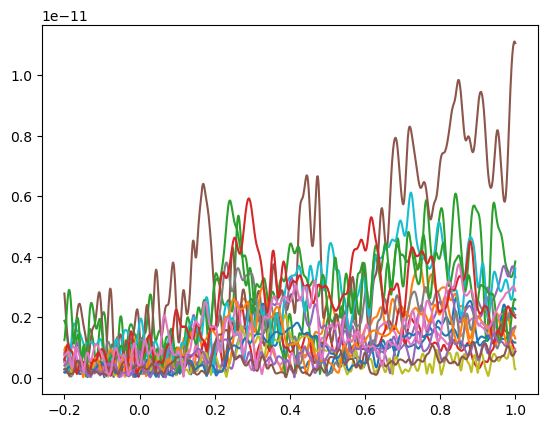

In [23]:
for i in range(0,17):
    plt.plot(time,new_data[i])

t = -2.218, p = 0.041
Cohen's d = -0.538


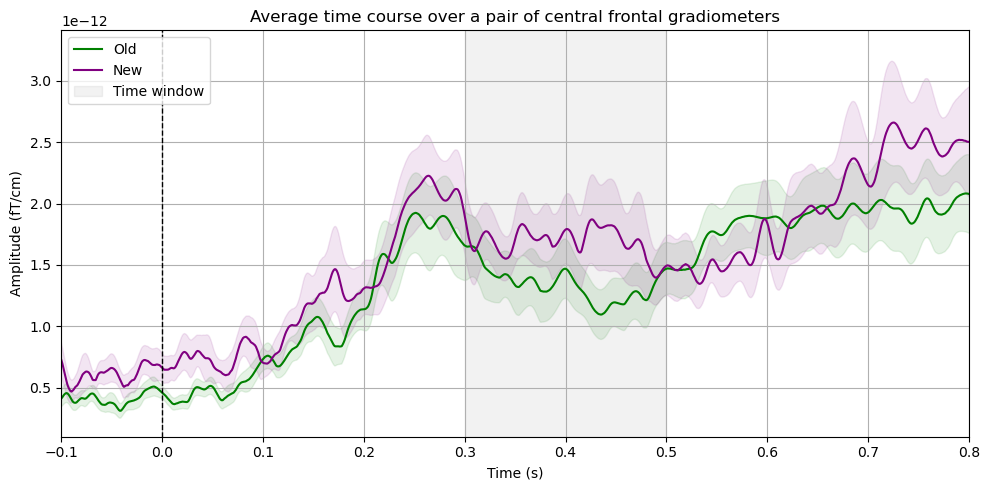

Identifying common channels ...
Identifying common channels ...


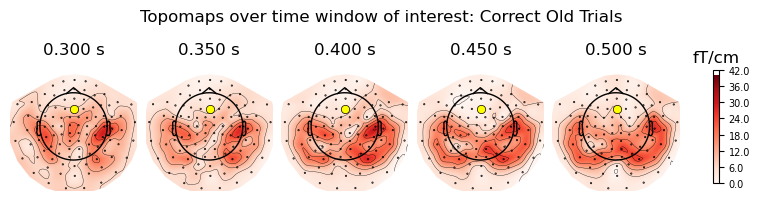

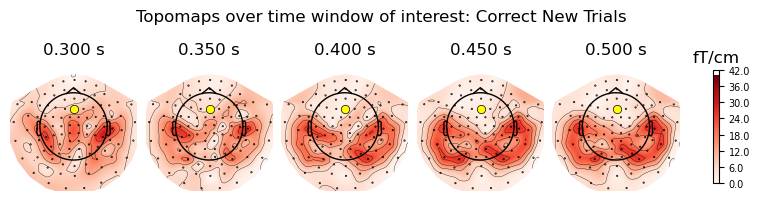

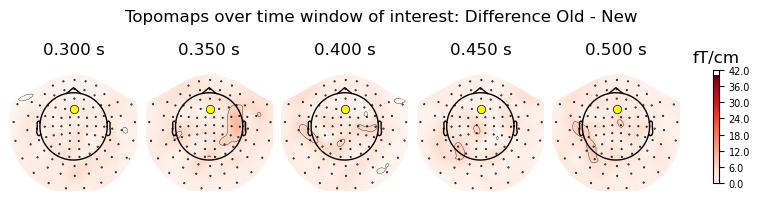

In [21]:
channels = ["MEG0623", "MEG0622"]  # frontal sensors
topomap_channel = channels[0]

old_data = []
new_data = []

# Compute norm of signal over two gradiometers
for evoked in evoked_all_old:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    old_data.append(data)

for evoked in evoked_all_new:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    new_data.append(data)

# Time vector
time = np.linspace(-0.2, 1.0, len(new_data[0]))

# Convert to arrays
old_data = np.array(old_data)
new_data = np.array(new_data)

# Compute mean and standard error
old_mean_signal = np.mean(old_data, axis=0)
old_se_signal = np.std(old_data, axis=0) / np.sqrt(len(new_data))

new_mean_signal = np.mean(new_data, axis=0)
new_se_signal = np.std(new_data, axis=0) / np.sqrt(len(new_data))

# Define time window for amplitude extraction
lower_t = 0.3
upper_t = 0.5
time_window = (time >= lower_t) & (time <= upper_t)

# Compute mean amplitudes in time window
old_amplitudes = np.mean(old_data[:, time_window], axis=1)
new_amplitudes = np.mean(new_data[:, time_window], axis=1)

t_stat, p_value = ttest_rel(old_amplitudes, new_amplitudes)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

diff = np.array(old_amplitudes) - np.array(new_amplitudes)
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohen_d = mean_diff / std_diff
print(f"Cohen's d = {cohen_d:.3f}")

# --- Plot time courses ---
plt.figure(figsize=(10, 5))
plt.plot(time, old_mean_signal, label='Old', color='green')
plt.fill_between(time, old_mean_signal - old_se_signal, old_mean_signal + old_se_signal,
                 color='green', alpha=0.1)

plt.plot(time, new_mean_signal, label='New', color='purple')
plt.fill_between(time, new_mean_signal - new_se_signal, new_mean_signal + new_se_signal,
                 color='purple', alpha=0.1)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (fT/cm)')
plt.title(f'Average time course over a pair of central frontal gradiometers')
plt.xlim(-0.1, 0.8)
plt.axvline(x=0, linestyle='--', linewidth=1, color='black')
plt.axvspan(lower_t, upper_t, color='grey', alpha=0.1, label = 'Time window')
plt.grid(True)
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

# --- Topomap (only one gradiometer channel marked) ---
times = np.arange(lower_t, upper_t + 0.02, 0.05)
vmin, vmax = 0, 40
# --- Equalize channels before averaging



# --- Compute grand averages
avg_old = mne.grand_average(evoked_all_old, interpolate_bads=False)
avg_new = mne.grand_average(evoked_all_new, interpolate_bads=False)

# --- Compute contrast
diff_old_new_evoked = mne.combine_evoked([avg_old, avg_new], weights=[1, -1])

# --- Create mask for only selected channel
n_channels = len(avg_old.ch_names)
n_times = len(avg_old.times)
mask = np.zeros((n_channels, n_times), dtype=bool)

chan_idx = avg_old.ch_names.index(topomap_channel)
time_idxs = [np.argmin(np.abs(avg_old.times - t)) for t in times]
for t in time_idxs:
    mask[chan_idx, t] = True

mask_params = dict(markersize=12, markerfacecolor="yellow")

# --- Plot topomaps ---
fig = avg_old.plot_topomap(times, ch_type="grad", show=False,
                           vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle("Topomaps over time window of interest: Correct Old Trials")
plt.show()

fig = avg_new.plot_topomap(times, ch_type="grad", show=False,
                           vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle("Topomaps over time window of interest: Correct New Trials")
plt.show()

fig = diff_old_new_evoked.plot_topomap(times, ch_type="grad", show=False,
                                       vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle("Topomaps over time window of interest: Difference Old - New")
plt.show()


t = 1.349, p = 0.196
Cohen's d = 0.327


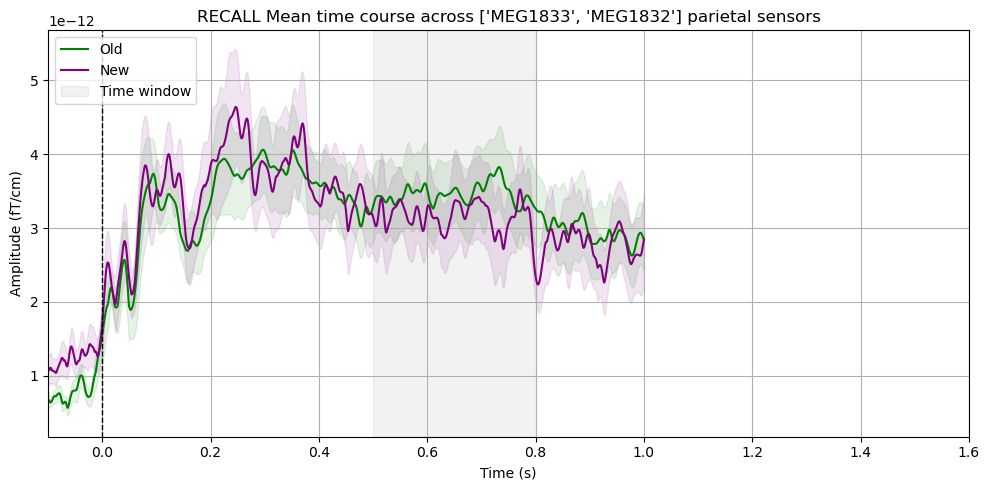

Identifying common channels ...
Identifying common channels ...


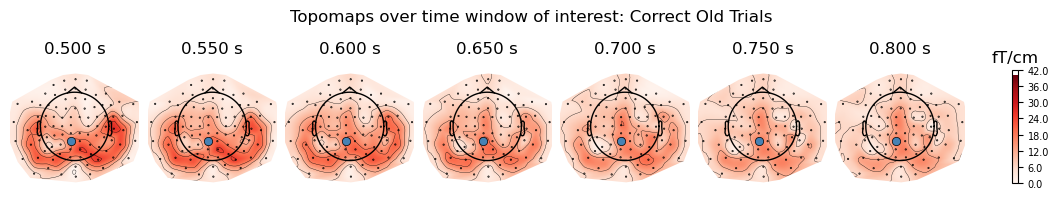

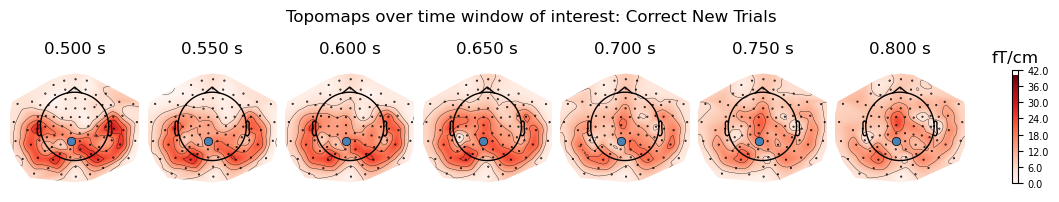

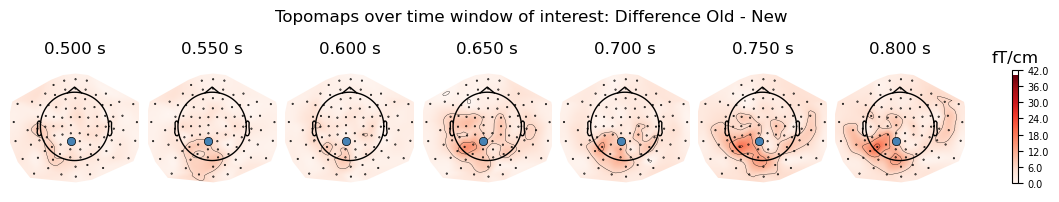

In [4]:
#channels = ["MEG0742", "MEG0743"]  # parietal sensors
channels = ["MEG1833","MEG1832"]
topomap_channel = channels[0]

old_data = []
new_data = []

# Compute norm of signal over two gradiometers
for evoked in evoked_all_old:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    old_data.append(data)

for evoked in evoked_all_new:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    new_data.append(data)

# Time vector
time = np.linspace(-0.2, 1.0, len(new_data[0]))


# Convert to arrays
old_data = np.array(old_data)
new_data = np.array(new_data)

# Compute mean and standard error
old_mean_signal = np.mean(old_data, axis=0)
old_se_signal = np.std(old_data, axis=0) / np.sqrt(len(new_data))

new_mean_signal = np.mean(new_data, axis=0)
new_se_signal = np.std(new_data, axis=0) / np.sqrt(len(new_data))

# Define time window for amplitude extraction
lower_t = 0.5
upper_t = 0.8
time_window = (time >= lower_t) & (time <= upper_t)

# Compute mean amplitudes in time window
old_amplitudes = np.mean(old_data[:, time_window], axis=1)
new_amplitudes = np.mean(new_data[:, time_window], axis=1)

t_stat, p_value = ttest_rel(old_amplitudes, new_amplitudes)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

diff = np.array(old_amplitudes) - np.array(new_amplitudes)
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohen_d = mean_diff / std_diff
print(f"Cohen's d = {cohen_d:.3f}")

# --- Plot time courses ---
plt.figure(figsize=(10, 5))
plt.plot(time, old_mean_signal, label='Old', color='green')
plt.fill_between(time, old_mean_signal - old_se_signal, old_mean_signal + old_se_signal,
                 color='green', alpha=0.1)

plt.plot(time, new_mean_signal, label='New', color='purple')
plt.fill_between(time, new_mean_signal - new_se_signal, new_mean_signal + new_se_signal,
                 color='purple', alpha=0.1)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (fT/cm)')
plt.title(f'RECALL Mean time course across {channels} parietal sensors')
plt.xlim(-0.1, 1.6)
plt.axvline(x=0, linestyle='--', linewidth=1, color='black')
plt.axvspan(lower_t, upper_t, color='grey', alpha=0.1, label = 'Time window')
plt.grid(True)
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

# --- Topomap (only one gradiometer channel marked) ---
times = np.arange(lower_t, upper_t + 0.02, 0.05)
vmin, vmax = 0, 40
# --- Equalize channels before averaging



# --- Compute grand averages
avg_old = mne.grand_average(evoked_all_old, interpolate_bads=False)
avg_new = mne.grand_average(evoked_all_new, interpolate_bads=False)

# --- Compute contrast
diff_old_new_evoked = mne.combine_evoked([avg_old, avg_new], weights=[1, -1])

# --- Create mask for only selected channel
n_channels = len(avg_old.ch_names)
n_times = len(avg_old.times)
mask = np.zeros((n_channels, n_times), dtype=bool)

chan_idx = avg_old.ch_names.index(topomap_channel)
time_idxs = [np.argmin(np.abs(avg_old.times - t)) for t in times]
for t in time_idxs:
    mask[chan_idx, t] = True

mask_params = dict(markersize=12, markerfacecolor="steelblue")

# --- Plot topomaps ---
fig = avg_old.plot_topomap(times, ch_type="grad", show=False,
                           vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle("Topomaps over time window of interest: Correct Old Trials")
plt.show()

fig = avg_new.plot_topomap(times, ch_type="grad", show=False,
                           vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle("Topomaps over time window of interest: Correct New Trials")
plt.show()

fig = diff_old_new_evoked.plot_topomap(times, ch_type="grad", show=False,
                                       vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle("Topomaps over time window of interest: Difference Old - New")
plt.show()


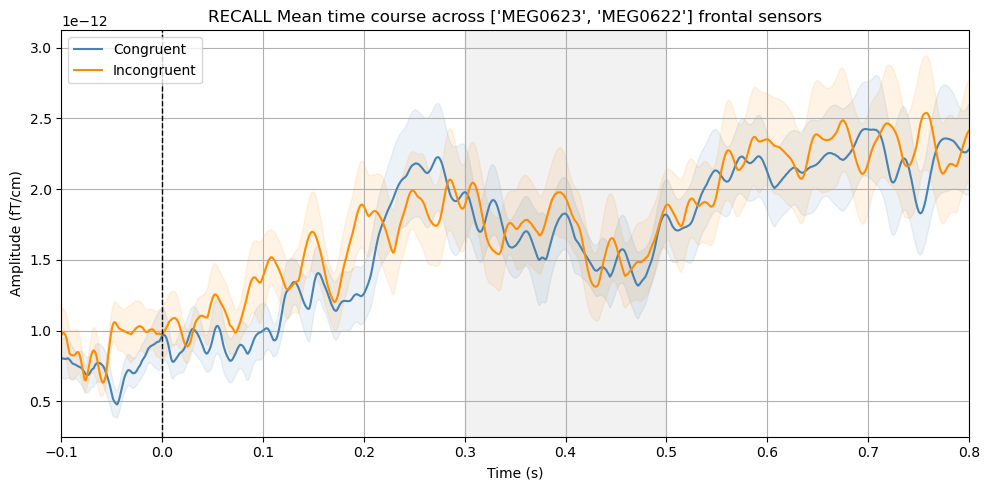

Identifying common channels ...
Identifying common channels ...


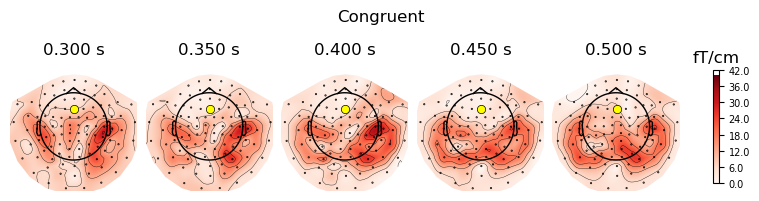

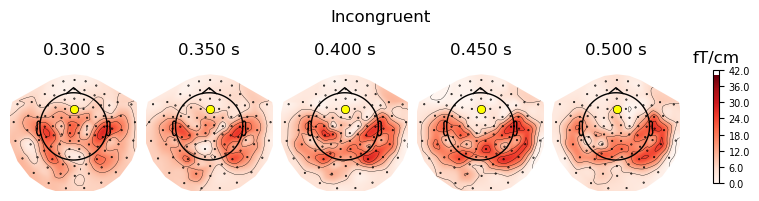

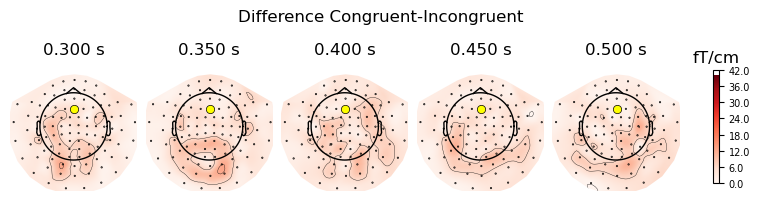

In [15]:
channels = ["MEG0623","MEG0622"] #frontal
topomap_channel = channels[0]       

cong_data = []
incong_data = []


for evoked in evoked_all_cong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    cong_data.append(data)

for evoked in evoked_all_incong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    incong_data.append(data)

time = np.linspace(-0.2, 1.0, len(cong_data[0]))  


# Compute mean and std across sensors
cong_mean_signal = np.mean(cong_data, axis=0)
cong_se_signal = np.std(cong_data, axis=0) / np.sqrt(len(cong_data))
incong_mean_signal = np.mean(incong_data, axis=0)
incong_se_signal = np.std(incong_data, axis=0) / np.sqrt(len(cong_data))


cong_data = np.array(cong_data)
incong_data = np.array(incong_data)


lower_t = 0.3
upper_t = 0.5
time_window = (time >= lower_t) & (time <= upper_t)

cong_amplitudes = np.mean(cong_data[:, time_window], axis=1)
incong_amplitudes = np.mean(incong_data[:, time_window], axis=1)



plt.figure(figsize=(10, 5))
plt.plot(time, cong_mean_signal, label='Congruent', color='steelblue')
plt.fill_between(time, cong_mean_signal - cong_se_signal, cong_mean_signal + cong_se_signal,
                 color='steelblue', alpha=0.1)

plt.plot(time, incong_mean_signal, label='Incongruent', color='darkorange')
plt.fill_between(time, incong_mean_signal - incong_se_signal, incong_mean_signal + incong_se_signal,
                 color='darkorange', alpha=0.1)



plt.xlabel('Time (s)')
plt.ylabel('Amplitude (fT/cm)')
plt.title(f'RECALL Mean time course across {channels} frontal sensors')
plt.legend(loc="upper left")
plt.xlim(-0.1,0.8)
plt.axvline(x=0, linestyle='--', linewidth=1, color='black')
plt.axvspan(lower_t, upper_t, color='grey', alpha=0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Topomap (only one gradiometer)
times = np.arange(lower_t, upper_t + 0.02, 0.05)
vmin, vmax = 0, 40

avg_cong = mne.grand_average(evoked_all_cong, interpolate_bads=False)
avg_incong = mne.grand_average(evoked_all_incong, interpolate_bads=False)
diff_cong_incong_evoked = mne.combine_evoked([avg_cong, avg_incong], weights=[1, -1])


# --- Create mask for only MEG0742
n_channels = len(avg_cong.ch_names)
n_times = len(avg_cong.times)
mask = np.zeros((n_channels, n_times), dtype=bool)

chan_idx = avg_cong.ch_names.index(topomap_channel)
time_idxs = [np.argmin(np.abs(avg_cong.times - t)) for t in times]
for t in time_idxs:
    mask[chan_idx, t] = True

mask_params = dict(markersize=12, markerfacecolor="yellow")

# --- Plot topomaps
fig = avg_cong.plot_topomap(times, ch_type="grad", show=False,
                            vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Congruent")
plt.show()

fig = avg_incong.plot_topomap(times, ch_type="grad", show=False,
                              vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Incongruent")
plt.show()



fig = diff_cong_incong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Difference Congruent-Incongruent")
plt.show()



t = -0.748, p = 0.465
Cohen's d = -0.181


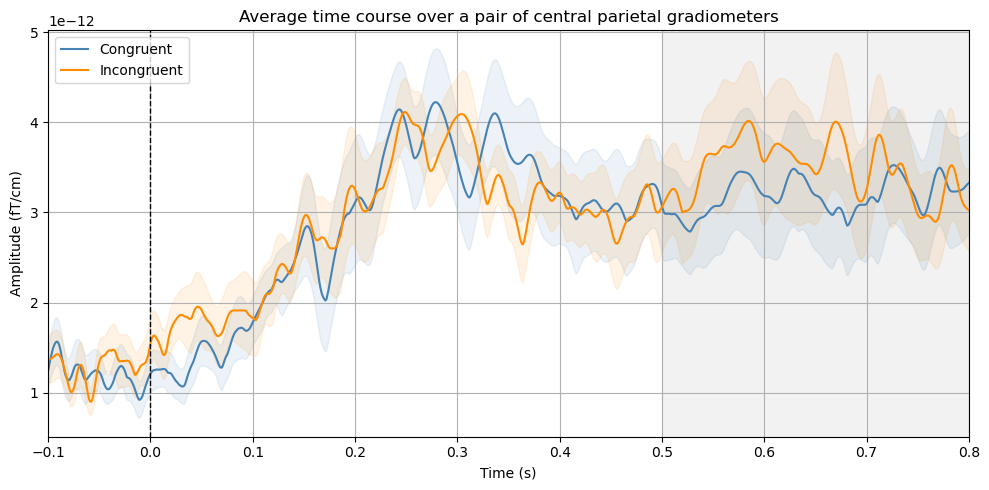

Identifying common channels ...
Identifying common channels ...


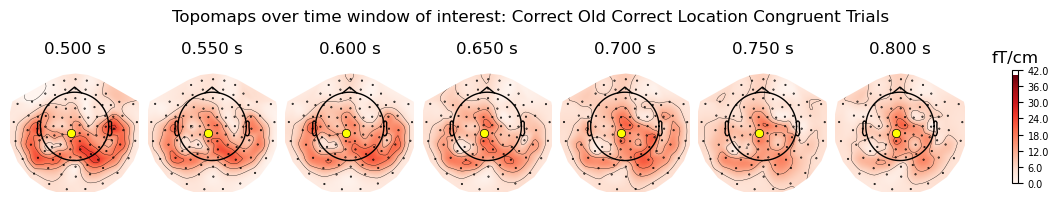

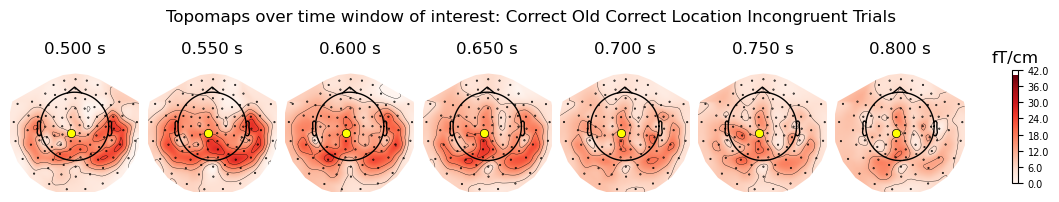

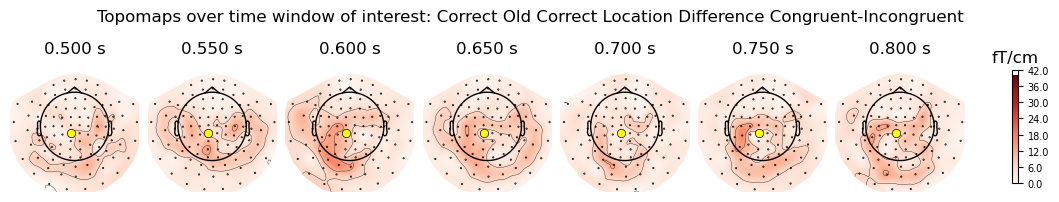

In [ ]:
channels = ["MEG0742", "MEG0743"]  # parietal sensors
topomap_channel = channels[0]       

cong_data = []
incong_data = []


for evoked in evoked_all_cong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    cong_data.append(data)

for evoked in evoked_all_incong:
    item = evoked.copy().pick(channels)
    data = np.sqrt(item.data[0]**2 + item.data[1]**2)
    incong_data.append(data)

time = np.linspace(-0.2, 1.0, len(cong_data[0]))  


# Compute mean and std across sensors
cong_mean_signal = np.mean(cong_data, axis=0)
cong_se_signal = np.std(cong_data, axis=0) / np.sqrt(len(cong_data))
incong_mean_signal = np.mean(incong_data, axis=0)
incong_se_signal = np.std(incong_data, axis=0) / np.sqrt(len(cong_data))


cong_data = np.array(cong_data)
incong_data = np.array(incong_data)


lower_t = 0.5
upper_t = 0.8
time_window = (time >= lower_t) & (time <= upper_t)

cong_amplitudes = np.mean(cong_data[:, time_window], axis=1)
incong_amplitudes = np.mean(incong_data[:, time_window], axis=1)

t_stat, p_value = ttest_rel(cong_amplitudes, incong_amplitudes)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

diff = np.array(cong_amplitudes) - np.array(incong_amplitudes)
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohen_d = mean_diff / std_diff
print(f"Cohen's d = {cohen_d:.3f}")



plt.figure(figsize=(10, 5))
plt.plot(time, cong_mean_signal, label='Congruent', color='steelblue')
plt.fill_between(time, cong_mean_signal - cong_se_signal, cong_mean_signal + cong_se_signal,
                 color='steelblue', alpha=0.1)

plt.plot(time, incong_mean_signal, label='Incongruent', color='darkorange')
plt.fill_between(time, incong_mean_signal - incong_se_signal, incong_mean_signal + incong_se_signal,
                 color='darkorange', alpha=0.1)



plt.xlabel('Time (s)')
plt.ylabel('Amplitude (fT/cm)')
plt.title(f'Average time course over a pair of central parietal gradiometers')
plt.legend(loc="upper left")
plt.xlim(-0.1,1.6)
plt.axvline(x=0, linestyle='--', linewidth=1, color='black')
plt.axvspan(lower_t, upper_t, color='grey', alpha=0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Topomap (only one gradiometer)
times = np.arange(lower_t, upper_t + 0.02, 0.05)
vmin, vmax = 0, 40

avg_cong = mne.grand_average(evoked_all_cong, interpolate_bads=False)
avg_incong = mne.grand_average(evoked_all_incong, interpolate_bads=False)
diff_cong_incong_evoked = mne.combine_evoked([avg_cong, avg_incong], weights=[1, -1])


# --- Create mask for only MEG0742
n_channels = len(avg_cong.ch_names)
n_times = len(avg_cong.times)
mask = np.zeros((n_channels, n_times), dtype=bool)

chan_idx = avg_cong.ch_names.index(topomap_channel)
time_idxs = [np.argmin(np.abs(avg_cong.times - t)) for t in times]
for t in time_idxs:
    mask[chan_idx, t] = True

mask_params = dict(markersize=12, markerfacecolor="yellow")

# --- Plot topomaps
fig = avg_cong.plot_topomap(times, ch_type="grad", show=False,
                            vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Topomaps over time window of interest: Correct Old Correct Location Congruent Trials")
plt.show()

fig = avg_incong.plot_topomap(times, ch_type="grad", show=False,
                              vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Topomaps over time window of interest: Correct Old Correct Location Incongruent Trials")
plt.show()



fig = diff_cong_incong_evoked.plot_topomap(times, ch_type="grad", show=False,
                               vlim=(vmin, vmax), mask=mask, mask_params=mask_params)
fig.suptitle(f"Topomaps over time window of interest: Correct Old Correct Location Difference Congruent-Incongruent")
plt.show()



Need more than one channel to make topography for grad. Disabling interactivity.


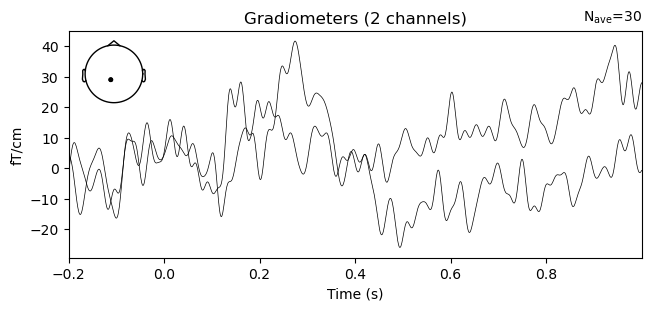

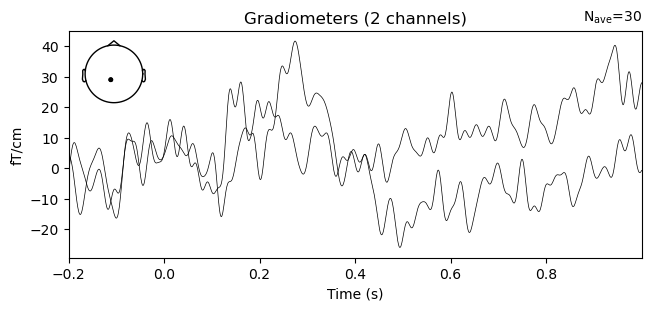

In [21]:
evoked_all_cong[0].plot(picks=["MEG0742","MEG0743"])

Need more than one channel to make topography for grad. Disabling interactivity.


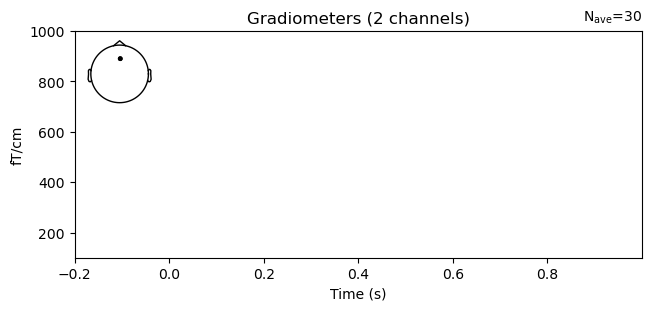

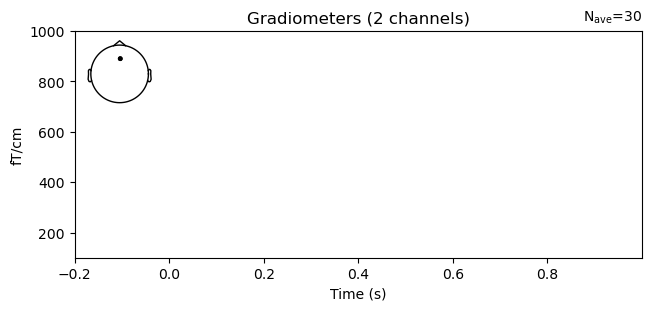

In [26]:

evoked_all_cong[0].plot(picks=["MEG0623","MEG0622"],ylim = dict(grad=[100,1001]))